# Neural Network Classification

In [1]:
import tensorflow as tf
from sklearn.datasets import make_circles

In [2]:
# Make 1000 examples
n_samples = 1000

# Create circle: Make a large circle containing a smaller in 2D
# A simple toy dataset to visualize clustering and classification problems
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [3]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

**Visualize the data**

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
circles = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


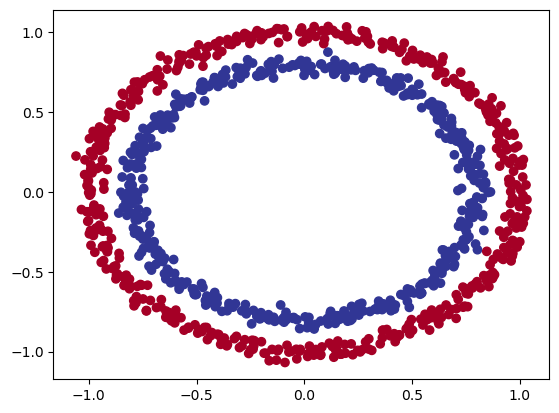

In [9]:
# visualize with a plot

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

**Input and Output Shape**

In [10]:
# check the shape
X.shape, y.shape

((1000, 2), (1000,))

**Modelling**

In [12]:
# Random seed
tf.random.set_seed(42)

# 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,))
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), 
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 4.6496 - accuracy: 0.4620
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 3.0907 - accuracy: 0.5050
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7709 - accuracy: 0.4990
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7145 - accuracy: 0.4950
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7003 - accuracy: 0.4970


> Accuracy of `49.7%` as shown above denote that the model is guessing. Hence, improve the model.

**Improve the model**

In [15]:
# add another layer - making (2) layers & optimizer (adam)

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(2, input_shape=(2,)),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss="binary_crossentropy", 
                optimizer='adam', metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.3800 - accuracy: 0.4870
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3179 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2950 - accuracy: 0.4870
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3005 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2868 - accuracy: 0.4870
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2314 - accuracy: 0.4850
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2040 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.2006 - accuracy: 0.4850
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1991 - accuracy: 0.4850
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 6.1978 - accuracy: 0.4860
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 4.9028 - accuracy: 0.4490
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9025 - accuracy: 0.4490
Epoch 85/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9022 - accuracy: 0.4470
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9020 - accuracy: 0.4480
Epoch 87/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9018 - accuracy: 0.4480
Epoch 88/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9016 - accuracy: 0.4480
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9013 - accuracy: 0.4480
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 4.8938 - accuracy: 0.4480
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 4.8672 - accuracy: 0.4490
Epoch 92/100
32/32 [==============================] - 0s 3ms/step - loss: 4.8663 - accuracy: 0.4490
Epoch 93/100


**Model 3**

In [16]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(2,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss="binary_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.9201 - accuracy: 0.5130
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.3370 - accuracy: 0.5450
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 2.0236 - accuracy: 0.4960
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7087 - accuracy: 0.4870
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6985 - accuracy: 0.4730
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.4920
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7006 - accuracy: 0.4790
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6969 - accuracy: 0.4770
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6966 - accuracy: 0.5130
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4930
Epoch 11/

32/32 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.5030
Epoch 84/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6951 - accuracy: 0.4990
Epoch 85/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4840
Epoch 86/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6956 - accuracy: 0.5120
Epoch 87/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.4740
Epoch 88/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.4650
Epoch 89/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.4740
Epoch 90/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.5080
Epoch 91/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6970 - accuracy: 0.4760
Epoch 92/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5060
Epoch 93/100


> Regardless of the modification, the model still perform badly.

**Visualize the model predictions**

In [17]:
model_3.predict(X)

32/32 [==============================] - 0s 2ms/step


array([[0.5130979 ],
       [0.51200444],
       [0.51185334],
       [0.5098252 ],
       [0.5180849 ],
       [0.50981927],
       [0.50967485],
       [0.51350707],
       [0.5170096 ],
       [0.50854796],
       [0.5153833 ],
       [0.5100444 ],
       [0.50944275],
       [0.51572526],
       [0.51678824],
       [0.5172163 ],
       [0.51415795],
       [0.5172751 ],
       [0.51313853],
       [0.51632714],
       [0.51195014],
       [0.50890815],
       [0.5181035 ],
       [0.5128641 ],
       [0.51043165],
       [0.51161313],
       [0.5091383 ],
       [0.5149715 ],
       [0.5173129 ],
       [0.51627004],
       [0.51738745],
       [0.50858253],
       [0.50978875],
       [0.51436687],
       [0.51837265],
       [0.50947   ],
       [0.5102296 ],
       [0.5105403 ],
       [0.5171979 ],
       [0.51116866],
       [0.5165048 ],
       [0.50940984],
       [0.5159473 ],
       [0.5153898 ],
       [0.5153738 ],
       [0.5142154 ],
       [0.517313  ],
       [0.510

**N.B:** Make a plot function to visualize the model prediction.

In [52]:
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y):
    """
    Plot the decision boundary created by a model predicting on X
    """
    # define the axis boundary of the plot and create meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    # create the meshgrid
    xx, yy = np.meshgrid(
                np.linspace(x_min, x_max, 100),
                np.linspace(y_min, y_max, 100))

    # create X value
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # make predictions
    y_pred = model.predict(x_in)

    # check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification...") 
        # reshape the prediction to get them ready
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification...")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
Doing binary classification...


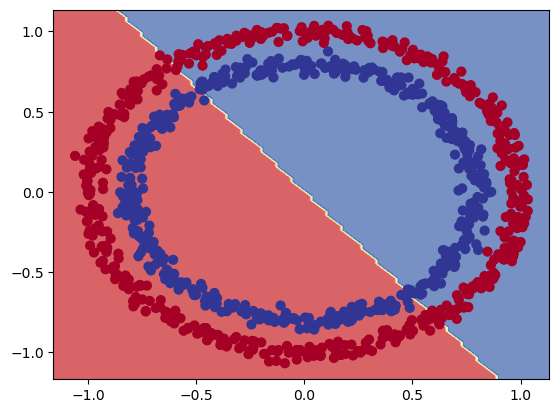

In [55]:
plot_decision_boundary(model_1,X,y)